In [1]:
import pandas as pd
import numpy as np##
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import UNdata_Export_GDP.csv

In [2]:
gdp_df = pd.read_csv("../../data/UNdata_Export_GDP.csv", skipfooter=3, engine='python')

print(gdp_df[:11])
print(gdp_df[-5:])

   Country or Area  Year        Value  Value Footnotes
0      Afghanistan  2019  2065.036398              NaN
1      Afghanistan  2018  2033.779002              NaN
2      Afghanistan  2017  2058.383832              NaN
3      Afghanistan  2016  2057.062164              NaN
4      Afghanistan  2015  2068.265904              NaN
5      Afghanistan  2014  2102.385234              NaN
6      Afghanistan  2013  2116.465454              NaN
7      Afghanistan  2012  2075.491747              NaN
8      Afghanistan  2011  1904.559799              NaN
9      Afghanistan  2010  1957.029338              NaN
10     Afghanistan  2009  1758.904043              NaN
     Country or Area  Year        Value  Value Footnotes
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              Na

#### Removes Value footnotes column and gives shape of resulting data set

In [3]:
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']

gdp_df.shape

(6868, 3)

##### Basic info on DataFrame

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


##### Count of countries with available data by year

In [5]:
gdp_df["Year"].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

##### Count of number of times a country is listed

In [6]:
gdp_df['Country'].value_counts()

High income                  30
Guinea                       30
Turkey                       30
Tonga                        30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

#### Subset of data for 2014

In [7]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


##### Basic information on GDP Per Capita data

In [8]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

#### Histogram of GDP Per Capita numbers for 2014

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

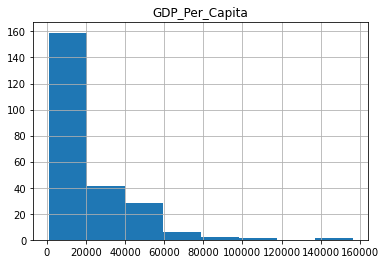

In [9]:
gdp_2014.hist(column="GDP_Per_Capita", bins=8)

##### Top 5 countries with Highest GDP Per Capita

In [10]:
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
113,Antigua and Barbuda,2014,18104.241470
143,Arab World,2014,14219.562395
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
5,Afghanistan,2014,2102.385234


##### Top 5 countries with lowest GDP Per Capita

In [11]:
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=True)

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
83,Angola,2014,8239.828837
53,Algeria,2014,11512.705405
23,Albania,2014,11623.866679
143,Arab World,2014,14219.562395
113,Antigua and Barbuda,2014,18104.241470


#### Pivot table  containing GDP Per Capita data for years 1990 & 2017

In [12]:
gdp_pivoted = gdp_df[gdp_df["Year"].isin([1990, 2017])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Country", 
                                                                columns="Year")
#drops any row where there are missing values
gdp_pivoted = gdp_pivoted.dropna()                                                   
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


##### Adds column calculating % change

In [13]:
gdp_pivoted["Percent_Change"] = (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990] * 100


##### Calculates number of countries with negative % change

In [14]:
sum(gdp_pivoted["Percent_Change"]<0)


17

#### Plots top two countries with highest % change in GDP per Capita

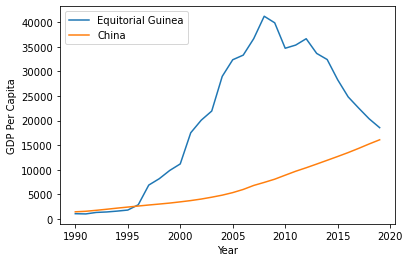

In [15]:
#Plot of the countries with the top two greatest change in GDP_per_capita
gdp_eguinea = gdp_df[gdp_df["Country"].
                     isin(["Equatorial Guinea"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")
gdp_china = gdp_df[gdp_df["Country"].
                   isin(["China"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")

plt.plot(gdp_eguinea)
plt.plot(gdp_china)
plt.legend(["Equitorial Guinea", "China"])
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.show()

In [16]:
continents = pd.read_csv("../../data/continents.csv", engine='python')

gdp_df = pd.merge(gdp_df, continents, on="Country")

#### Histogram of number of countries in each continent by data present

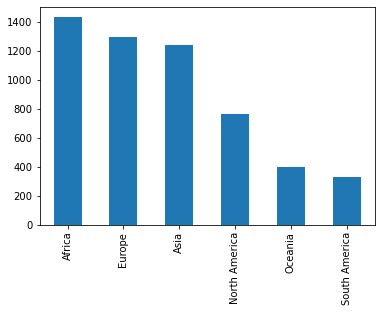

In [17]:
gdp_df['Continent'].value_counts().plot(kind='bar')
plt.show()


#### HIstogram of number of countries in each continent counted in a year 

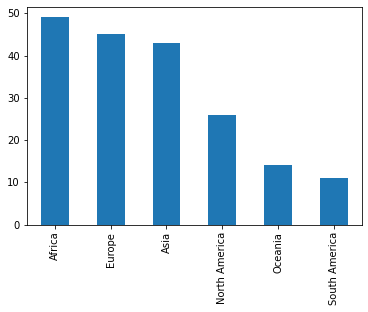

In [18]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014['Continent'].value_counts().plot(kind='bar')
plt.show()

#### Boxplot showing GDP per capita in 2014 split by continent

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

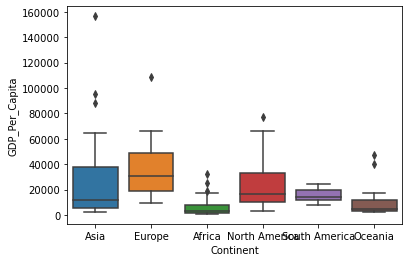

In [19]:
sns.boxplot(x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"])

### Import of internet_use.cvs

In [20]:
internet_df = pd.read_csv("../../data/UNdata_Export_Internet.csv", nrows=4496, engine='python')
internet_df = internet_df.drop(columns='Value Footnotes')
internet_df.columns=['Country', 'Year', 'Internet_Users_Pct']

internet_df.shape
internet_df.info()
internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


#### Fixing countries name discrepencies 

In [21]:

replace_country_labels = ({"Brunei Darussalam": "Brunei", 
                           "Central African Rep.":"Central African Republic", 
                           "Congo (Democratic Republic of the)":"Dem. Rep. Congo", 
                           "Dominican Rep.":"Dominican Republic", 
                           "Hong Kong, China":"Hong Kong SAR, China", 
                           "Iran (Islamic Rep. of)":"Iran", 
                           "Korea (Rep. of)":"Korea", 
                           "Kyrgyzstan":"Kyrgyz Republic", 
                           "Lao P.D.R.":"Lao PDR", 
                           "Macao, China":"Macao SAR, China", 
                           "Micronesia (Fed. States of)":"Micronesia", 
                           "Viet Nam":"Vietnam"})
internet_df = internet_df.replace({"Country": replace_country_labels})


#### Shows years there where there is a non-zero amount of internet use

In [22]:
internet_df.loc[internet_df['Internet_Users_Pct'] > 0].sort_values("Year", ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


#### Internet use over time

<AxesSubplot:xlabel='Year'>

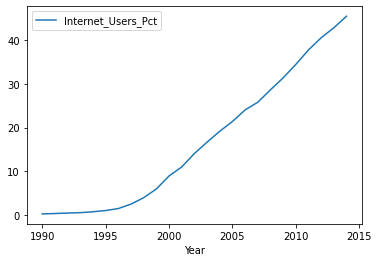

In [23]:
internet_df[internet_df['Internet_Users_Pct'] > 0].pivot_table(values="Internet_Users_Pct", index=["Year"], aggfunc=np.mean).plot()


In [24]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=["Country", "Year"])

### Internet usage in 2014

In [25]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]


#### Filters countries with at least 90% internet use in 2014

In [26]:
sum(gdp_and_internet_use_2014["Internet_Users_Pct"] >= 90)

13

#### Graph of top countries with greatest % internet users in 2014

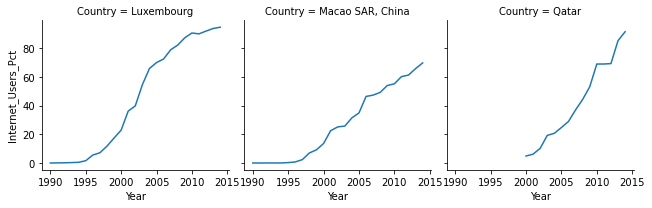

In [27]:
gdp_and_internet_use_2014.sort_values("GDP_Per_Capita", ascending=False)

#gdp_and_internet_top_three = 
gdp_and_internet_top_three = gdp_and_internet_use[gdp_and_internet_use["Country"]
                     .isin(["Macao SAR, China", "Luxembourg", "Qatar"])]
gdp_and_internet_top_three
top_internet_3 = sns.FacetGrid(gdp_and_internet_top_three, col="Country") 
top_internet_3.map(plt.plot, "Year", "Internet_Users_Pct")


#### Internet use vs GDP per capita figures in 2014

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

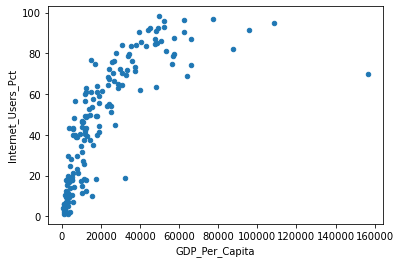

In [28]:
gdp_and_internet_use_2014.plot("GDP_Per_Capita", "Internet_Users_Pct", kind="scatter")

#### Correlation of Internet use vs GDP

In [29]:
x = gdp_and_internet_use_2014["GDP_Per_Capita"]
y = gdp_and_internet_use_2014["Internet_Users_Pct"]
np.corrcoef(x, y)

array([[1.        , 0.76285229],
       [0.76285229, 1.        ]])

#### Adding column of Log of GDP per capita

In [30]:
gdp_and_internet_use_2014["Log_GDP"] = np.log(gdp_and_internet_use_2014["GDP_Per_Capita"])
gdp_and_internet_use_2014


<ipython-input-30-dd054c721ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["Log_GDP"] = np.log(gdp_and_internet_use_2014["GDP_Per_Capita"])


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Log_GDP
0,Afghanistan,2014,2102.385234,Asia,6.39,7.650828
13,Albania,2014,11623.866679,Europe,60.10,9.360816
34,Algeria,2014,11512.705405,Africa,18.09,9.351207
56,Angola,2014,8239.828837,Africa,21.26,9.016735
76,Antigua and Barbuda,2014,18104.241470,North America,64.00,9.803902
...,...,...,...,...,...,...
3605,Uzbekistan,2014,5764.492705,Asia,43.55,8.659472
3626,Vanuatu,2014,3116.077025,Oceania,18.80,8.044330
3646,Vietnam,2014,6098.489609,Asia,48.31,8.715796
3666,Zambia,2014,3450.046561,Africa,17.34,8.146143


#### Internet use vs GDP per capita with log transformation on GDP

<AxesSubplot:xlabel='Log_GDP', ylabel='Internet_Users_Pct'>

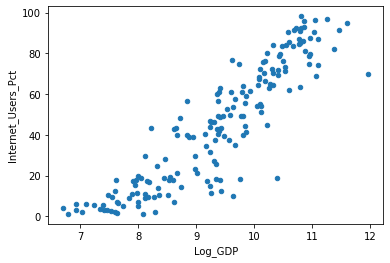

In [31]:
gdp_and_internet_use_2014.plot("Log_GDP", "Internet_Users_Pct", kind="scatter")

#### Correlation with the log transformation on GDP

In [32]:
np.corrcoef(gdp_and_internet_use_2014['Log_GDP'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.       , 0.8985838],
       [0.8985838, 1.       ]])